Step 1: Load and Explore Data
We'll start by generating the synthetic data and then load it into a pandas DataFrame. We'll also convert the 'Date' column to a datetime object for easier manipulation.

        Date  Temperature
0 2023-01-01    20.993428
1 2023-01-02    19.895990
2 2023-01-03    21.640364
3 2023-01-04    23.563411
4 2023-01-05    20.221255


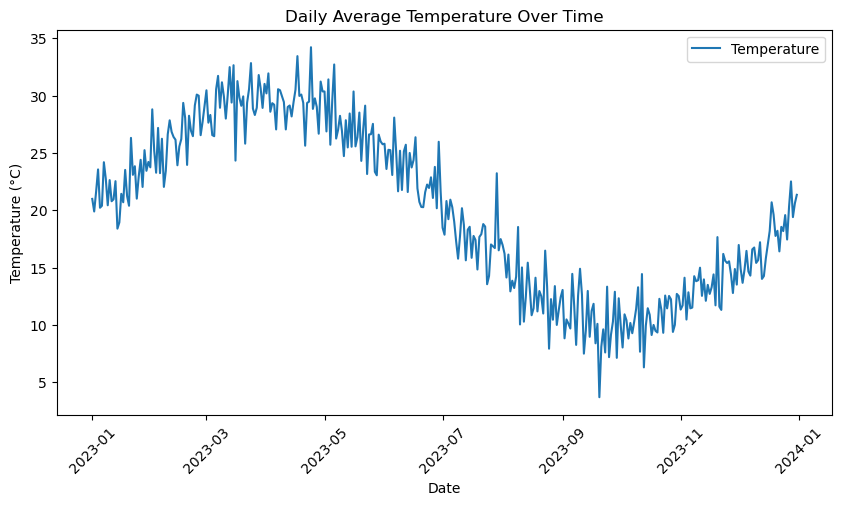

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Generate synthetic temperature data
np.random.seed(42)
date_rng = pd.date_range(start='2023-01-01', periods=365, freq='D')
temperature = 20 + np.sin(np.linspace(0, 3.14 * 2, 365)) * 10 + np.random.randn(365) * 2

# Create DataFrame
df = pd.DataFrame({'Date': date_rng, 'Temperature': temperature})

# Save data to CSV
df.to_csv('temperature_data.csv', index=False)

# Load the data (simulating that it's already loaded)
df = pd.read_csv('temperature_data.csv')

# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Display the first few rows
print(df.head())

# Plot the temperature trend over time
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Temperature'], label='Temperature')
plt.title('Daily Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


Step 2: Simple Forecasting Model
Naïve Forecasting Model:
The naive model assumes that tomorrow's temperature is the same as today's.

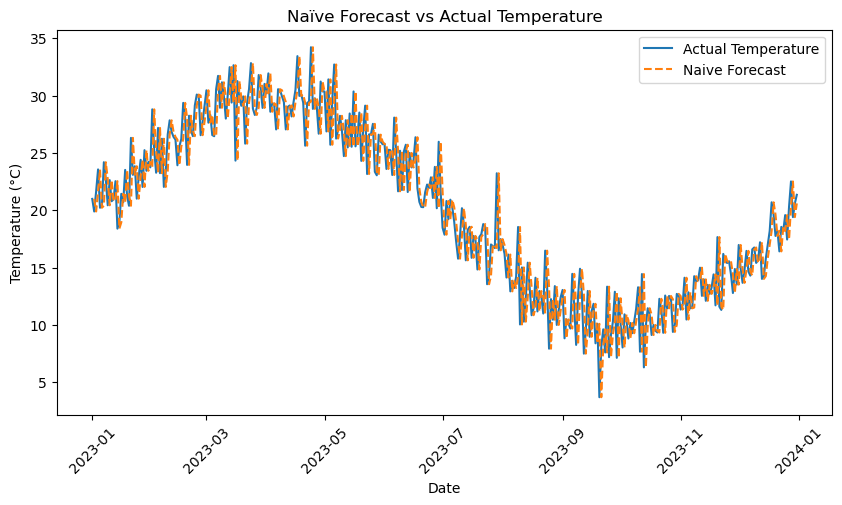

In [2]:
# Naïve Forecast: Tomorrow's temperature = Today's temperature
df['Naive_Forecast'] = df['Temperature'].shift(1)

# Plot the Naive Forecast against actual data
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Temperature'], label='Actual Temperature')
plt.plot(df['Date'], df['Naive_Forecast'], label='Naive Forecast', linestyle='--')
plt.title('Naïve Forecast vs Actual Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Moving Average Model:
The moving average model predicts tomorrow's temperature as the average of the last 7 days.

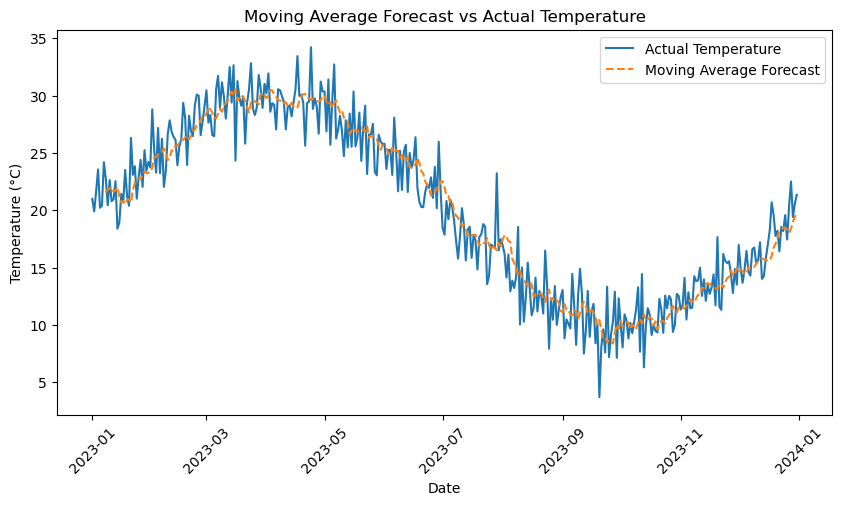

In [3]:
# Moving Average Forecast (7 days)
df['Moving_Avg_Forecast'] = df['Temperature'].rolling(window=7).mean().shift(1)

# Plot the Moving Average Forecast against actual data
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Temperature'], label='Actual Temperature')
plt.plot(df['Date'], df['Moving_Avg_Forecast'], label='Moving Average Forecast', linestyle='--')
plt.title('Moving Average Forecast vs Actual Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Step 3: Evaluation
We'll evaluate the performance of both forecasting models using the Mean Absolute Error (MAE). This metric will help us compare how well each model predicts the temperature.

In [4]:
# Remove rows with NaN values that will be generated by the shift() and rolling() functions
df_clean = df.dropna()

# Calculate MAE for both models
mae_naive = mean_absolute_error(df_clean['Temperature'], df_clean['Naive_Forecast'])
mae_moving_avg = mean_absolute_error(df_clean['Temperature'], df_clean['Moving_Avg_Forecast'])

print(f"Naïve Forecast MAE: {mae_naive:.2f}")
print(f"Moving Average Forecast MAE: {mae_moving_avg:.2f}")

Naïve Forecast MAE: 2.21
Moving Average Forecast MAE: 1.61


Step 4: Predict the Next 7 Days
We'll use the best-performing model (based on MAE) to predict the temperature for the next 7 days. Let’s assume the Moving Average model is the better one based on the evaluation.

        Date  Forecasted_Temperature
0 2024-01-01               20.174216
1 2024-01-02               20.174216
2 2024-01-03               20.174216
3 2024-01-04               20.174216
4 2024-01-05               20.174216
5 2024-01-06               20.174216
6 2024-01-07               20.174216


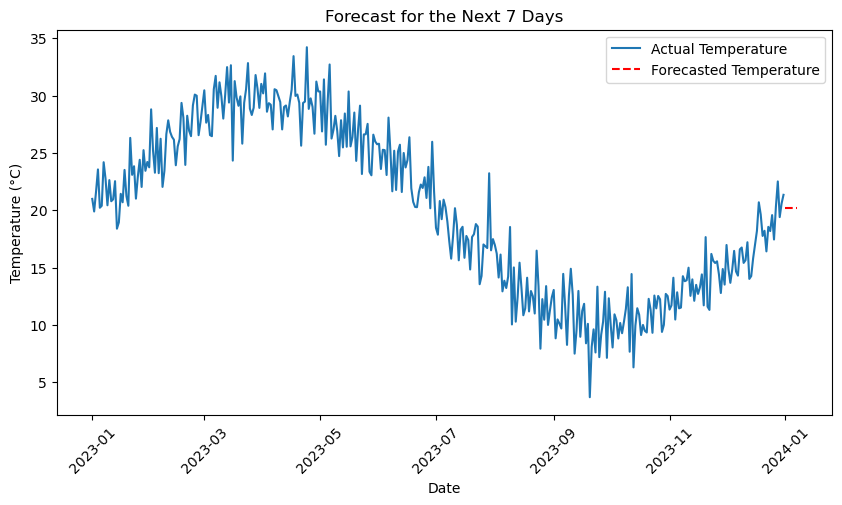

In [5]:
# Use the Moving Average Model to forecast the next 7 days
# Get the last 7 days from the dataset
last_7_days = df['Temperature'].tail(7)

# Forecast the next 7 days (predict the average of these 7 days)
next_7_days_forecast = [last_7_days.mean()] * 7

# Create a date range for the next 7 days
next_7_days_dates = pd.date_range(start=df['Date'].max() + pd.Timedelta(days=1), periods=7, freq='D')

# Create a DataFrame for the forecasted data
forecast_df = pd.DataFrame({
    'Date': next_7_days_dates,
    'Forecasted_Temperature': next_7_days_forecast
})

print(forecast_df)

# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Temperature'], label='Actual Temperature')
plt.plot(forecast_df['Date'], forecast_df['Forecasted_Temperature'], label='Forecasted Temperature', linestyle='--', color='red')
plt.title('Forecast for the Next 7 Days')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.xticks(rotation=45)
plt.show()